In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
np.random.seed(100)

In [2]:
class neurona:
    w=[]
    y=0
    delta=0
    # Funcion de activacion: 1 = funcion sigmoide; 2 = funcion tangente hiperbolica
    f_activ=1
    # Tasa de aprendizaje
    n = 0.8
    
    # Inicializa pesos aleatorios segun la cantidad de entradas que recibira el perceptron
    # por lo general, n_entradas = entradas + bias
    # size_hiddenlayers es la cantidad de capas ocultas de la red neuronal. En este caso, 1
    def __init__(self, n_entradas, size_hiddenlayers=1):
        self.w = np.random.rand(n_entradas)*np.sqrt(2/(size_hiddenlayers))

    # Funcion de activacion/transferencia
    def factivacion(self, x):
        if(self.f_activ==1):
            # funcion sigmoide
            return 1/(1+math.exp(-x))
        elif(self.f_activ==2):
            # funcion tangente hiperbolica
            return ( 2/(1+math.exp(-2*x)) ) -1
        
    def dfactivacion(self, x):
        if(self.f_activ==1):
            # funcion sigmoide
            return x*(1-x)
        elif(self.f_activ==2):
            # funcion tangente hiperbolica
            return 1-(x*x)

    def predict(self, x):
        suma=0
        for i in range(len(x)):
            suma += x[i]*self.w[i]
            
        self.y = self.factivacion(suma)
    
    def train(self, x):
        for i in range( len(self.w) ):
            self.w[i] += self.n*self.delta*self.dfactivacion(self.y)*x[i]
    


In [15]:
class rn_multicapa:
    # Lista que almacena las neuronas de la capa oculta
    hiddenLayer = []
    # Lista que almacena las neuronas de la capa de salida
    outputLayer = []
    # Valor del sesgo
    vSesgo=1
    
    def __init__(self, size_inputLayer, size_hiddenLayer, size_outputLayer):
        self.hiddenLayer.clear()
        self.outputLayer.clear()
        # Crea size_hiddenLayer neuronas en la lista de la capa oculta
        # Inicializa cada neurona para tener size_inputLayer pesos, mas un peso para el bias
        for p in range(size_hiddenLayer):
            self.hiddenLayer.append(neurona(size_inputLayer+1)) 
            
        # Crea size_outputLayer neuronas en la lista de la capa de salida
        # Inicializa cada neurona para tener size_hiddenLayer pesos, mas un peso para el bias
        for r in range(size_outputLayer):
            self.outputLayer.append(neurona(size_hiddenLayer+1))
            
    def predict(self, x):
        # Agrega temporalmente la entrada bias al conjunto de entrada
        x.append(self.vSesgo) 
        # Almacena temporalmente las salidas de las neuronas de la capa oculta
        temp=[] 
        # Calcula el output de cada neurona en la capa oculta y la almacena en la lista temp
        for p in range( len(self.hiddenLayer) ):
            self.hiddenLayer[p].predict(x)
            temp.append(self.hiddenLayer[p].y)
        
        # Con la lista temp, calcula el output de las neuronas en la capa de salida
        temp.append(self.vSesgo)
        for p in self.outputLayer:
            p.predict(temp)
            
        temp.clear()
        x.pop() 
    
    # Recibe un conjunto de entradas x y su conjunto de salidas correctas z
    def train(self, x, z):
        self.predict(x)
        ## Calculo de deltas
        # Definimos los deltas de las neuronas en la capa de salida
        for p in range( len(self.outputLayer) ):
            self.outputLayer[p].delta = z[p]-self.outputLayer[p].y
            
        # Definimos los deltas de los perceptrones en la capa oculta
        for p in range( len(self.hiddenLayer) ):
            suma=0
            for r in range( len(self.outputLayer) ):
                suma+= self.outputLayer[r].delta*self.outputLayer[r].w[p]
            self.hiddenLayer[p].delta = suma
        
        ## Calculo de nuevos pesos
        # agregamos temporalmente el sesgo al conjunto de entrada
        x.append(self.vSesgo)
        # Almacena temporalmente las salidas de las neuronas de la capa oculta
        temp=[]
        for p in self.hiddenLayer:
            p.train(x)
            temp.append(p.y)
            
        # agregamos el sesgo al conjunto de entrada de la capa de salida
        temp.append(self.vSesgo)
        for p in self.outputLayer:
            p.train(temp)
            
        x.pop()
        temp.clear()
        
    def printWeights(self):
        print("Neuronas de la capa oculta:")
        for p in range( len(self.hiddenLayer) ):
            print(f"\tNeurona {p+1}:")
            for w in range(len(self.hiddenLayer[p].w[:-1])):
                print(f"\t\tw{w+1} = {self.hiddenLayer[p].w[w]}")
            print(f"\t\tb1 = {self.hiddenLayer[p].w[-1]}")
        
        print("Neuronas de la capa de salida:")
        for p in range( len(self.outputLayer) ):
            print(f"\tNeurona {p+1}:")
            for w in range(len(self.outputLayer[p].w[:-1])):
                print(f"\t\tw{w+1} = {self.outputLayer[p].w[w]}")
            print(f"\t\tb2 = {self.hiddenLayer[p].w[-1]}")
            

In [16]:
# Inicializa una red neuronal que recibe 3 inputs,
# tiene 6 neuronas en la capa oculta y 1 de salida
rn=rn_multicapa(3,4,1)
print("Pesos iniciales")
rn.printWeights()

Pesos iniciales
Neuronas de la capa oculta:
	Neurona 1:
		w1 = 1.3294029199450965
		w2 = 1.1563308407319839
		w3 = 0.4753340783366442
		b1 = 0.24806784266443094
	Neurona 2:
		w1 = 0.5272641363505229
		w2 = 0.008044764247668406
		w3 = 0.35698477254207783
		b1 = 1.1252367105547207
	Neurona 3:
		w1 = 0.021573787230184226
		w2 = 0.8468924253895781
		w3 = 0.8539085681368386
		b1 = 0.1487012827618697
	Neurona 4:
		w1 = 0.5401495998980478
		w2 = 0.05158493393509951
		w3 = 1.2592321091136152
		b1 = 1.3872315796014505
Neuronas de la capa de salida:
	Neurona 1:
		w1 = 0.08477077354208469
		w2 = 1.2594221529514114
		w3 = 0.8158619246049005
		w4 = 1.0500248461089188
		b2 = 0.24806784266443094


In [5]:
setX = [[1,1],
        [1,0],
        [0,1],
        [0,0]]
setZ = [[0],[1],[1],[0]]

In [6]:
setX = [[1,1,1],
        [1,1,0],
        [1,0,1],
        [1,0,0],
        [0,1,1],
        [0,1,0],
        [0,0,1],
        [0,0,0]]

setZ = [[1],[0],[0],[1],[0],[1],[1],[0]]

In [7]:
def toVF(x):
    if(x>0.5):
        return 1
    else:
        return 0

In [18]:
print("Valores deseados:")
for x, z in zip(setX,setZ):
    print(f"{x}|{z}")

print("Valores predichos:")
print("x1 x2 | x1 XOR x2")
for s in setX:
    rn.predict(s)
    y=[]
    yVF=[]
    for n in rn.outputLayer:
        y.append(n.y)
        yVF.append(toVF(n.y))
    print(f"{s} | {yVF} => y = {y}")

Valores deseados:
[1, 1, 1]|[1]
[1, 1, 0]|[0]
[1, 0, 1]|[0]
[1, 0, 0]|[1]
[0, 1, 1]|[0]
[0, 1, 0]|[1]
[0, 0, 1]|[1]
[0, 0, 0]|[0]
Valores predichos:
x1 x2 | x1 XOR x2
[1, 1, 1] | [1] => y = [0.9781548092590955]
[1, 1, 0] | [1] => y = [0.9720998734515813]
[1, 0, 1] | [1] => y = [0.9755305063937313]
[1, 0, 0] | [1] => y = [0.966997938515106]
[0, 1, 1] | [1] => y = [0.9754296707956484]
[0, 1, 0] | [1] => y = [0.9663137264089006]
[0, 0, 1] | [1] => y = [0.9721309938324505]
[0, 0, 0] | [1] => y = [0.9596131002810295]


In [9]:
outputs = {"[1,1]": [],
          "[1,0]": [],
          "[0,1]": [],
          "[0,0]": []}
out_df = pd.DataFrame(outputs)

In [10]:
outputs = {"[1,1,1]": [],
          "[1,1,0]": [],
          "[1,0,1]": [],
          "[1,0,0]": [],
          "[0,1,1]": [],
          "[0,1,0]": [],
          "[0,0,1]": [],
          "[0,0,0]": []}
out_df = pd.DataFrame(outputs)

In [11]:
# Bucle de épocas de entrenamiento.
for j in range(2000):
    yvalues = []
    for i in range(len(setX)):
        rn.predict(setX[i])
        yvalues.append(rn.outputLayer[0].y)
    out_df.loc[len(out_df.index)] = yvalues
    
    for i in range(len(setX)):
        rn.train(setX[i], setZ[i])
        rn.predict(setX[i])

In [12]:
print("Valores predichos:")
print("x1 x2 | x1 XOR x2")
for s in setX:
    rn.predict(s)
    print( s[0], s[1], s[2], "|", toVF(rn.outputLayer[0].y), f" => Y = {rn.outputLayer[0].y}" )

Valores predichos:
x1 x2 | x1 XOR x2
1 1 1 | 1  => Y = 0.9986214325247506
1 1 0 | 0  => Y = 0.051308583558650075
1 0 1 | 0  => Y = 0.02093118832250986
1 0 0 | 1  => Y = 0.9616359853676681
0 1 1 | 0  => Y = 0.02081890233563055
0 1 0 | 1  => Y = 0.9616201908068231
0 0 1 | 1  => Y = 0.9993084288269509
0 0 0 | 0  => Y = 0.0005464827657430639


In [13]:
#print("Pesos finales")
#rn.printWeights()

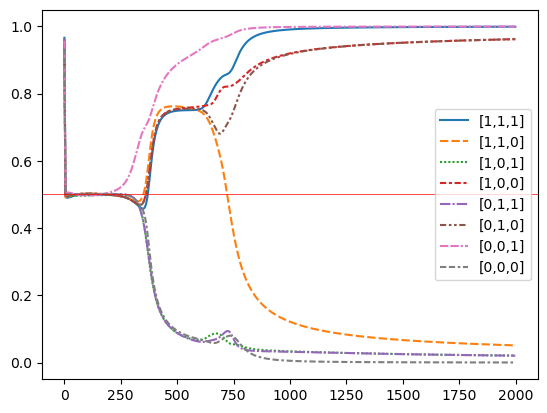

In [14]:
graph1 = sns.lineplot(out_df)
graph1.axhline(y=.5, linewidth=0.5, color='r') 